<a href="https://colab.research.google.com/github/MrUmidjan90/My-signature-verification/blob/main/CEDAR_20_persons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Базы для обучения/CEDAR_20_persons.zip","r") as zip_ref:
    zip_ref.extractall("data")

In [12]:
import os, shutil
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [13]:
train_dir = os.getcwd()+'/data/CEDAR_20_persons/train/'
test_dir = os.getcwd()+'/data/CEDAR_20_persons/test/'
validate_dir = os.getcwd()+'/data/CEDAR_20_persons/validate/'

In [14]:
train_dir = os.getcwd()+'/data/CEDAR_20_persons/train/'
test_dir = os.getcwd()+'/data/CEDAR_20_persons/test/'
validate_dir = os.getcwd()+'/data/CEDAR_20_persons/validate/'
#Test DIR
DIR3=os.getcwd()+'/data/CEDAR_20_persons/test/forged/'
DIR4=os.getcwd()+'/data/CEDAR_20_persons/test/genuine/'

#Validate DIR
DIR5=os.getcwd()+'/data/CEDAR_20_persons/validate/validate_forged/'
DIR6=os.getcwd()+'/data/CEDAR_20_persons/validate/validate_genuine/'

In [18]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(300,150,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 298, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 149, 74, 32)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 147, 72, 64)       18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 71, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 35, 17, 128)     

In [19]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(300,150),
        batch_size=200,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validate_dir,
        target_size=(300,150),
        batch_size=100,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=4,
      epochs=200
    ,
      validation_data=validation_generator,
      validation_steps=2)
model.save('model1.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Found 720 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/200
4/4 [==============================] - 17s 3s/step - loss: 0.7011 - acc: 0.5431 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 2/200
4/4 [==============================] - 4s 950ms/step - loss: 0.6922 - acc: 0.5153 - val_loss: 0.6896 - val_acc: 0.5000
Epoch 3/200
4/4 [==============================] - 4s 963ms/step - loss: 0.6870 - acc: 0.5222 - val_loss: 0.6794 - val_acc: 0.6938
Epoch 4/200
4/4 [==============================] - 4s 979ms/step - loss: 0.6831 - acc: 0.5889 - val_loss: 0.6625 - val_acc: 0.6625
Epoch 5/200
4/4 [==============================] - 4s 958ms/step - loss: 0.6730 - acc: 0.6208 - val_loss: 0.6696 - val_acc: 0.5437
Epoch 6/200
4/4 [==============================] - 4s 958ms/step - loss: 0.6585 - acc: 0.6278 - val_loss: 0.6062 - val_acc: 0.7188
Epoch 7/200
4/4 [==============================] - 4s 911ms/step - loss: 0.6284 - acc: 0.6472 - val_loss: 0.5775 - val_acc: 0.6875
Epoch 8/200
4/4 [==============================] - 4s 965ms/step - loss: 0.5963 - acc

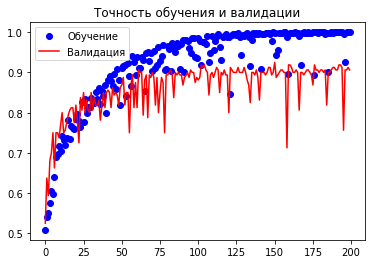

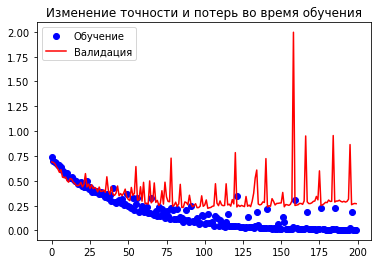

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Обучение')
plt.plot(epochs, val_acc, 'red', label='Валидация')
plt.title('Точность обучения и валидации')
plt.legend() 

plt.figure()

plt.plot(epochs, loss, 'bo', label='Обучение')
plt.plot(epochs, val_loss, 'red', label='Валидация')
plt.title('Изменение точности и потерь во время обучения')
plt.legend()

plt.show()